In [29]:
using Plots
using StatsPlots
using DataFrames
using CSV

gr()

Plots.GRBackend()

In [30]:
num_idx = 15

15

In [31]:
theme(:default)

grs = []

mi = 0
ma = 0
for index in 1:num_idx
    elbos = []
    relbos = []
    loops = []
    open("../log_$index.txt", "r") do io
        for (num, line) in enumerate(eachline(io))
            if num <= 3 || num % 2 == 0
                continue 
            end 
            tmps = split(strip(line), '\t')
            push!(loops, parse(Int, tmps[2]))
            push!(elbos, parse(Float64, tmps[3]))
            push!(relbos, parse(Float64, tmps[4]))
        end 
    end 
    
    df = DataFrame(
        loops = loops,
        ELBO = elbos, 
        RELBO = relbos,
        rindex = ["$index" for _ in 1:length(elbos)]
    )
    
#     mi = minimum(df[:, :ELBO]) -5000
    ma = maximum(df[:, :ELBO]) > 0 ? 0 : (maximum(df[:, :RELBO]) + 5000)
    p = @df df plot(
        :loops, [:ELBO], 
        lw=2.5, linestyle=:dash, color=:auto,   
        leg=false,
#         ylims=(-1e+8, ma)
    )
    push!(grs, p)
#     display(p)
end 

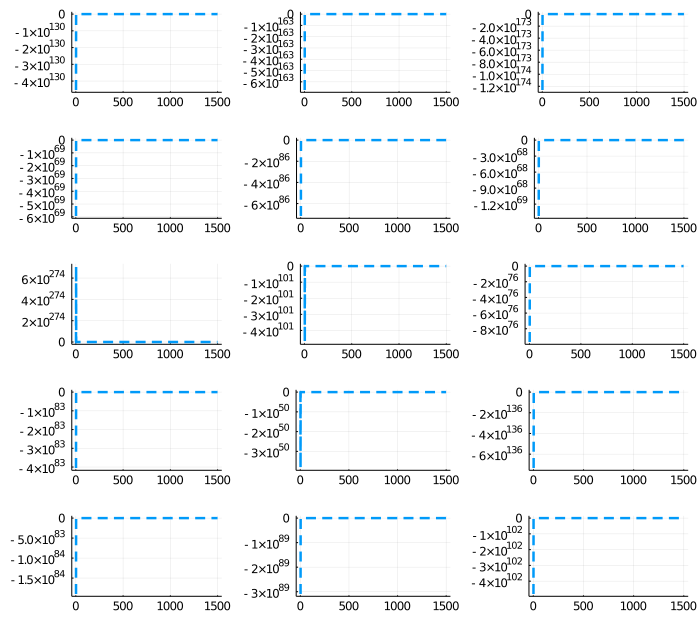

In [32]:
plot(grs..., layout=(5, 3), size=(700, 630))

In [35]:
theme(:wong2)

grs = []

mi = 0
ma = 0
for index in 1:num_idx
    elbos = []
    relbos = []
    loops = []
    open("../log_$index.txt", "r") do io
        for (num, line) in enumerate(eachline(io))
            if num <= 121 || num % 2 == 0
                continue 
            end 
            tmps = split(strip(line), '\t')
            push!(loops, parse(Int, tmps[2]))
            push!(elbos, parse(Float64, tmps[3]))
            push!(relbos, parse(Float64, tmps[4]))
        end 
    end 
    
    df = DataFrame(
        loops = loops,
        ELBO = elbos, 
        RELBO = relbos,
        rindex = ["$index" for _ in 1:length(elbos)]
    )
    
#     mi = minimum(df[:, :ELBO]) -5000
#     ma = maximum(df[:, :RELBO]) > 0 ? 0 : (maximum(df[:, :RELBO]) + 5000)
    p = @df df plot(
        :loops, [:RELBO], 
        lw=2.5, linestyle=:dash, color=:auto,   
        leg=false,
#         ylims=(mi, ma)
    )
    push!(grs, p)
#     display(p)
end 

SystemError: SystemError: opening file "../log_1.txt": No such file or directory

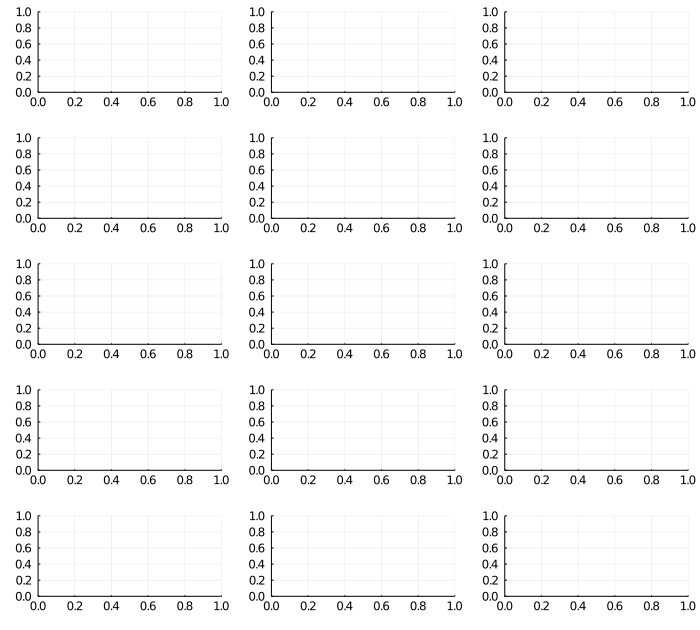

In [36]:
plot(grs..., layout=(5, 3), size=(700, 630))